### Introduction to making piplelines using GridSearchCV
After completing this lab you will be able to:

- Build and evaluate a machine learning pipeline
- Implement GridSearchCV for hyperparameter tuning with crossvalidation
- Implement and optimize a complex classification pipeline using real-world data
- Extract feature importances from a trained pipeline

In [18]:
#Importing libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#1. Taking iris dataset and train it using KNN classification method 
from sklearn.datasets import load_iris

data = load_iris()

x, y = data.data, data.target

labels = data.target_names

#### Making Pipleline where we are doing the following processes 

1. Data Pre-processing: - StandardScaler
2. Dimension Reduction: - PCA 
3. Model Selection: - KNN Classification

In [3]:
#Pipleline 
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA(n_components= 2)),
    ('knn', KNeighborsClassifier(n_neighbors= 5))
])


- **Stratified Cross validation**: - Ensures that each classfied datapoints have their density, variance and distribution intact throughout validaton fold. 

In [6]:
#Split datasets into training, testing and validation sets. 
#Cross validaton technique used: Stratified Cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42, stratify= y)


In [7]:
#Model Development
pipeline = pipeline.fit(x_train, y_train)

In [11]:
#Model Prediction 
y_predict = pipeline.predict(x_test)

In [ ]:
#Model Score on the testing sets 
print(f'Model accuracy score: {pipeline.score(x_test, y_test) * 100: .3f}')

Model accuracy score:  90.000


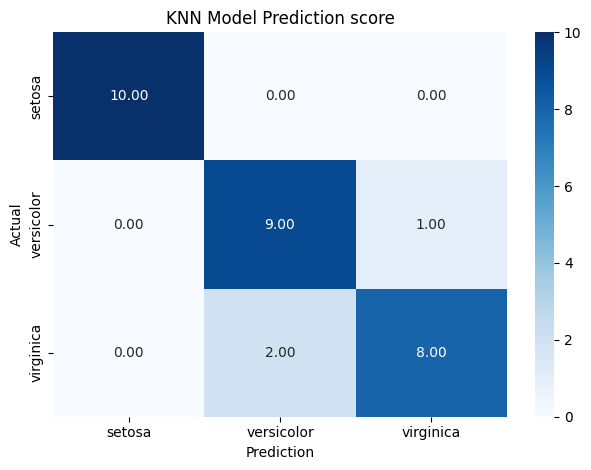

In [27]:
#Model Evaluation based on the confusion matrix 
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_test, y_predict)

sns.heatmap(con_matrix, annot= True, fmt= '.2f', xticklabels= labels, cmap= 'Blues', yticklabels= labels)
plt.title('KNN Model Prediction score')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


- **KNN Model Prediction**:
    - 2 Virginica are classified wrongly as versicolor
    - 1 Versicolor is classdifed wrongly as virginica

### Instantiate the pipeline
- Preprocess the data by scaling it and transforming it onto a to-be-determined number of principle components, follow that up with a KNN model classifier, and combine these estimators into a pipeline. 
- We'll then optimize the pipeline using crossvalidation over a hyperparameter grid search. This will allow us find the best model for the set of trial hyperparamters.

In [ ]:
#Model development and evaluation using GridSearchCV and Stratisfied Cross validation 
pipelines = Pipeline([
    ('standard', StandardScaler()),
    ('pca', PCA()), 
    ('knn', KNeighborsClassifier()),
])

In [32]:
#Pre-defined hyperparamerts for PCA & KNN model 
grid_params = {
    'pca__n_components': [2, 3],
    'knn__n_neighbors': [3, 5, 7]
}

In [34]:
#Make a cross validation (using stratisfy cross validation)
cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

| verbose value | Effect                                                                                   |
| --------------- | ---------------------------------------------------------------------------------------- |
| `0` (default)   | No output at all.                                                                        |
| `1`             | Minimal — prints only high-level progress.                                               |
| `2`             | More detailed — prints progress for each parameter combination.                          |
| `3` or higher   | Very detailed — prints progress for each **cross-validation fold** for each combination. |

In [35]:
#Using GridSearchCV pipeline to make cross validation more suitable 
ml_pipeline = GridSearchCV(
    estimator= pipelines,
    param_grid= grid_params, 
    cv= cv,
    scoring= 'accuracy',
    verbose= 2
)

In [39]:
#Model Development on k-fold cross-validation technique
ml_pipeline = ml_pipeline.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=5, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=5, pca__n_c

- **Total Combination of cross validation** = no. of PCA * no. of n_neighbors * no of splits in validation
- Total = 2 * 3 * 5 = 30 splits combinations

In [41]:
#Model accuracy score and model prediction 
y_predict = ml_pipeline.predict(x_test)

print(f'Model Accuracy Score using Grid Search for Cross Validaton: {ml_pipeline.score(x_test, y_test): .3f}')

Model Accuracy Score using Grid Search for Cross Validaton:  0.933


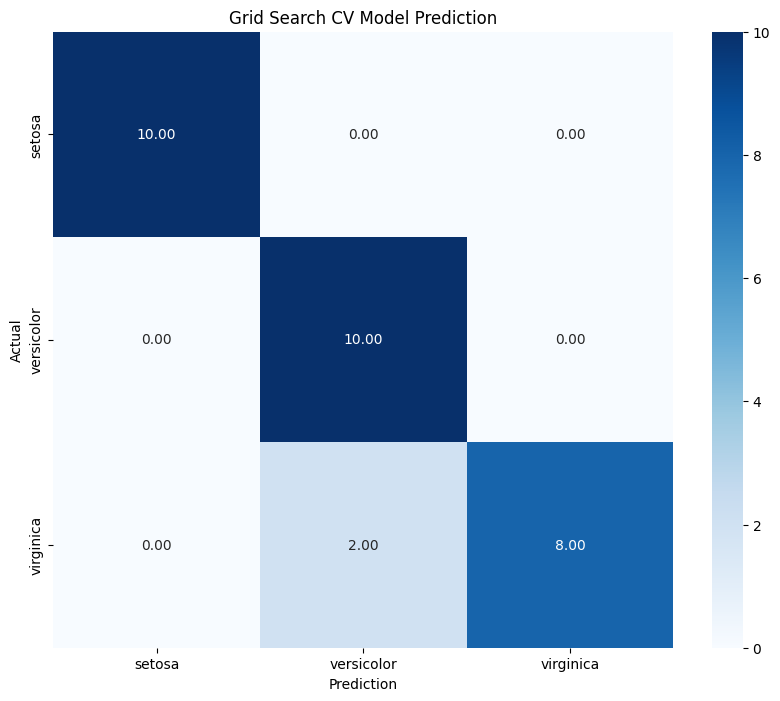

In [43]:
#Model visualization using confusion matrix 
matrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize= (10, 8))
sns.heatmap(matrix, cmap= 'Blues', annot= True, fmt= '.2f', xticklabels= labels, yticklabels= labels)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Grid Search CV Model Prediction')
plt.show()

In [44]:
#Get best parameters for this ml pipeline 
ml_pipeline.best_params_

{'knn__n_neighbors': 3, 'pca__n_components': 3}

- KNN Model Prediction `GridSearchCV`:
    - 2 Virginica are classified wrongly as versicolor
    - **But** model accuracy increase by 3% using this GridSearchCV pipeline. 

---
- **Features of GridSearchCV pipeline method**
    - the process becomes automated and rigorous:
    - It tries all combinations in param_grid.
    - It uses cross-validation to avoid overfitting to a single train-test split.
    - It returns the best parameters and the best model.